# Product Propensity Pycaret Feature Test
* StellarAlgo Data Science
* Peter Morrison
* Dec 20 2022 - Jan 3 2023


This tests the following features in the `setup` function (results can be found by the setup cell):
* remove_outliers=True,
* fix_imbalance=True,
* normalize=True,
* normalize_method="robust",
* polynomial_features=True,
* trigonometry_features=True,
* create_clusters=True,
* bin_numeric_features=[]

**Outcome**: Generally, no difference. This needs to be tested w/ more than just the Canucks to have a proper accounting though. 

* fix_imbalance is just SMOTE though, so we don't need to use the actual library for it. 
* remove_outliers is good but cuts off a fair bit. With reducing the amount to 0.01 it gets the really drastic ones and it only cuts on the appropriate side (so with 0, 1, 2, 99999, it will cut 9999 only while how we did this manually it might cut 0 too)
* Polynomial, trigonometry, clusters: didnt have a noticable impact
* ordinal vs categorical product_current: no change
* Binning didnt make a huge change, but 

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC
from pycaret.classification import *
from shared_utilities import helpers

In [3]:
CLUSTER = "prod-app"
DATABASE = "stlrcanucks"
LKUPCLIENTID = "7"
SCORING_YEAR = 2022

## Model Training

In [4]:
dataset = helpers.get_product_propensity_dataset(
    cluster=CLUSTER,
    database=DATABASE,
    lkupclientid=LKUPCLIENTID,
    scoring_year=SCORING_YEAR,
    type_flag=0 
)

dataset.shape

Attempting to automatically open the SSO authorization page in your default browser.
If the browser does not open or you wish to use a different device to authorize this request, open the following URL:

https://device.sso.us-east-1.amazonaws.com/

Then enter the code:

ZTWC-PFWT
Successfully logged into Start URL: https://stellaralgo.awsapps.com/start#/
Authorized as AROASQ4JELIXYLYV6P4UV:pmorrison@stellaralgo.com


(699108, 27)

In [66]:
df = dataset.copy()

In [41]:
pd.set_option('display.max_columns', None)
df.head()

,lkupclientid,clientcode,dimcustomermasterid,seasonyear,distance,tenure,events_prior,attended_prior,attendedpct_prior,events_last,attended_last,attendedpct_last,atp_last,product_last,product_current,product,spend_current,volume_current,attendance_current,events_current,sends,sends_prior,opens,opens_prior,date_last_send,date_last_touch,date_last_save
0,7,CANUCKS,738,2019,247.50,1,1,1,1.00000000000000000,0.0,0.0,0E-17,0.00,None,None,None,79.5,2,1.00000000000000000,1,3.0,0.0,0.0,0.0,2022-11-15,None,2022-10-18
1,7,CANUCKS,738,2021,247.50,3,1,1,1.00000000000000000,1.0,1.0,1.00000000000000000,39.75,None,None,None,0.0,0,0E-17,0,3.0,0.0,0.0,0.0,2022-11-15,None,2022-10-18
2,7,CANUCKS,739,2021,314.03,2,1,1,1.00000000000000000,0.0,0.0,0E-17,0.00,None,None,None,0.0,2,1.00000000000000000,1,3.0,1.0,2.0,0.0,2022-11-23,None,2022-12-07
3,7,CANUCKS,754,2017,19.24,2,4,4,1.00000000000000000,4.0,4.0,1.00000000000000000,0.00,None,None,None,0.0,0,0E-17,0,1.0,0.0,0.0,0.0,2022-10-27,None,2022-12-08
4,7,CANUCKS,754,2018,19.24,3,5,5,1.00000000000000000,0.0,0.0,0E-17,0.00,None,None,None,0.0,2,1.00000000000000000,1,1.0,0.0,0.0,0.0,2022-10-27,None,2022-12-08


In [42]:
# df["distance_buckets"] = pd.cut(df["distance"], bins=[0,15,30,60,120,1000], labels=["Close", "Within_City", "Outside_City", "Within_State", "Outside_State"])
# df["spend_current_buckets"] = pd.cut(df["spend_current"], bins=[-1,1,30,200,1000,10000,100000000], labels=["Non_Spender", "Low_Spender", "Medium_Spender", "High_Spender", "Super_Spender", "Extreme_Spender"])

In [43]:
def col_ins(df, cat_vars):
    return [df.columns.get_loc(col) for col in cat_vars]

In [44]:
df_dataset.head()

,atp_last,attendedpct_last,attendedpct_prior,attendance_current,attended_last,attended_prior,clientcode,dimcustomermasterid,date_last_save,date_last_send,events_last,events_prior,distance,events_current,lkupclientid,opens,opens_prior,product,product_current,product_last,seasonyear,sends,sends_prior,spend_current,tenure,volume_current
454,116.43,0.95454545454545454,0.90740740740740740,0.71052631578947368,42.0,147,CANUCKS,1244,2022-12-28,2022-12-06,44.0,162,46.10,38,7,60.0,71.0,Full Season,None1,Individual,2021,67.0,44.0,9478.5,5,84
490,116.43,0.95454545454545454,0.90909090909090909,0.90909090909090909,42.0,10,CANUCKS,1393,2022-12-07,2022-10-27,44.0,11,6.52,11,7,0.0,0.0,Quarter,None1,Individual,2016,1.0,1.0,1293.6,1,22
520,0.00,0E-17,1.00000000000000000,0E-17,0.0,1,CANUCKS,3059,2022-12-22,2022-12-05,0.0,1,308.16,0,7,98.0,77.0,Quarter,None1,None1,2019,49.0,29.0,0.0,3,0
584,52.75,1.00000000000000000,1.00000000000000000,0E-17,1.0,2,CANUCKS,3330,2022-12-07,2022-12-05,1.0,2,0.39,0,7,48.0,21.0,Quarter,None1,None1,2019,23.0,12.0,0.0,3,0
689,52.75,1.00000000000000000,1.00000000000000000,1.00000000000000000,1.0,22,CANUCKS,3534,2022-12-22,2022-12-05,1.0,22,11.21,22,7,49.0,77.0,Half Season,None1,None1,2016,37.0,26.0,2956.8,1,44


In [49]:
df_dataset[df_dataset.apply(lambda row: row.astype(str).str.contains('None').any(), axis=1)]

,atp_last,attendedpct_last,attendedpct_prior,attendance_current,attended_last,attended_prior,clientcode,dimcustomermasterid,date_last_save,date_last_send,events_last,events_prior,distance,events_current,lkupclientid,opens,opens_prior,product,product_current,product_last,seasonyear,sends,sends_prior,spend_current,tenure,volume_current
454,116.43,0.95454545454545454,0.90740740740740740,0.71052631578947368,42.0,147,CANUCKS,1244,2022-12-28,2022-12-06,44.0,162,46.10,38,7,60.0,71.0,Full Season,None,Individual,2021,67.0,44.0,9478.50,5,84
490,116.43,0.95454545454545454,0.90909090909090909,0.90909090909090909,42.0,10,CANUCKS,1393,2022-12-07,2022-10-27,44.0,11,6.52,11,7,0.0,0.0,Quarter,None,Individual,2016,1.0,1.0,1293.60,1,22
520,0.00,0E-17,1.00000000000000000,0E-17,0.0,1,CANUCKS,3059,2022-12-22,2022-12-05,0.0,1,308.16,0,7,98.0,77.0,Quarter,None,None,2019,49.0,29.0,0.00,3,0
584,52.75,1.00000000000000000,1.00000000000000000,0E-17,1.0,2,CANUCKS,3330,2022-12-07,2022-12-05,1.0,2,0.39,0,7,48.0,21.0,Quarter,None,None,2019,23.0,12.0,0.00,3,0
689,52.75,1.00000000000000000,1.00000000000000000,1.00000000000000000,1.0,22,CANUCKS,3534,2022-12-22,2022-12-05,1.0,22,11.21,22,7,49.0,77.0,Half Season,None,None,2016,37.0,26.0,2956.80,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698556,91.88,1.00000000000000000,1.00000000000000000,1.00000000000000000,11.0,1,CANUCKS,678302416,2022-12-28,2022-12-03,11.0,1,23.84,1,7,25.0,0.0,Quarter,None,Quarter,2016,18.0,0.0,294.08,1,4
698572,181.65,1.00000000000000000,1.00000000000000000,1.00000000000000000,45.0,90,CANUCKS,680037080,2022-12-28,2022-12-06,45.0,90,0.39,45,7,1.0,0.0,Full Season,None,None,2017,26.0,0.0,49688.50,2,272
698869,117.08,0.93333333333333333,0.92222222222222222,0.91111111111111111,42.0,83,CANUCKS,746990733,2022-12-22,2022-12-06,45.0,90,38.71,45,7,4.0,0.0,Full Season,None,None,2017,6.0,0.0,13702.50,2,90
698870,152.25,0.91111111111111111,0.94029850746268656,0.97727272727272727,41.0,126,CANUCKS,746990733,2022-12-22,2022-12-06,45.0,134,38.71,44,7,4.0,0.0,Full Season,Full Season,None,2018,6.0,0.0,13973.00,3,88


In [53]:
df_dataset["product_current"].value_counts()

Full Season    6527
None           6237
Quarter        1671
Half Season     915
Individual      407
Mini Pack       107
Groups           45
Name: product_current, dtype: int64

0

In [67]:
# choose the features for the stellar base PP model
features = [
    "atp_last",
    "attendedpct_last",
    "attendedpct_prior",
    "attendance_current",
    "attended_last",
    "attended_prior",
    "clientcode",
    "dimcustomermasterid",
    "date_last_save",
    "date_last_send",
    # "date_last_touch",
    "events_last",
    "events_prior",
    "distance",
    # "distance_buckets",
    "events_current",
    "lkupclientid",
    "opens",
    "opens_prior",
    "product",
    "product_current",
    "product_last",
    "seasonyear",
    "sends",
    "sends_prior",
    "spend_current",
    # "spend_current_buckets",
    "tenure",
    "volume_current"
]

# copy your main dataframe
df_dataset = df

# creating the training and evaluation dataframe
df_dataset = df_dataset[features]

# limiting classes to only product plans
product_plans = ["Full Season", "Half Season", "Quarter", "Mini Pack"]

df_dataset = df_dataset[df_dataset["product"].isin(product_plans)]

df_dataset = df_dataset.fillna(method="ffill")
df_dataset = df_dataset.dropna()

cat_idx_lst = [index for index, col in enumerate(df_dataset.columns) if df_dataset[col].dtype.name == 'object']
categorical_indices = col_ins(df_dataset, ["product_current", "product_last", "clientcode", "date_last_save", "date_last_send"])
sm = SMOTENC(random_state=42, categorical_features=cat_idx_lst)

X_res, y_res = sm.fit_resample(df_dataset.drop(["product"], axis=1), df_dataset["product"])

df_dataset = X_res
df_dataset["product"] = y_res

df_train = df_dataset.sample(frac=0.90, random_state=786)
df_eval = df_dataset.drop(df_train.index)

df_train.reset_index(drop=True, inplace=True)
df_eval.reset_index(drop=True, inplace=True)

# print out the number of records for training and eval
print('Data for Modeling: ' + str(df_train.shape))
print('Unseen Data For Predictions: ' + str(df_eval.shape), end="\n\n")

Data for Modeling: (36616, 26)
Unseen Data For Predictions: (4068, 26)



In [69]:
df_train["product"].value_counts()

Full Season    9176
Quarter        9175
Half Season    9171
Mini Pack      9094
Name: product, dtype: int64

In [96]:
setup(
    data= df_train, 
    target="product", 
    train_size = 0.90,
    data_split_shuffle=True,
    ignore_features=[
        # "attendedpct_prior",
        # "attendedpct_last",
        "attendance_current",
        "clientcode",
        "dimcustomermasterid",
        "distance",
        "events_current",
        "lkupclientid",
        # "product_current",
        # "product_last",
        "seasonyear",
        "spend_current",
        "volume_current",
        "sends",
        "sends_prior",
        "opens",
        "opens_prior",
        "date_last_send",
        # "date_last_touch",
        "date_last_save"
    ],
    silent=True,
    verbose=False,
    categorical_features=[
        "product_current",
        "product_last",
    ],
    numeric_features=[
        "atp_last",
        "attended_last",
        "attended_prior",
        "attendedpct_prior",
        "attendedpct_last",
        "events_last",
        "events_prior",
        "tenure",
        "distance",
    ],
    # bin_numeric_features=[
    #     "distance",
    #     "sends",
    #     "spend_current",
    #     "opens"
    # ],
    # remove_outliers=True,
    # fix_imbalance=True,
    # normalize=True,
    # normalize_method="robust",
    # polynomial_features=True,
    # trigonometry_features=True,
    # create_clusters=True,
    # ordinal_features={
    #     "product_current": ["Full Season", "Half Season", "Quarter", "Mini Pack"]
    # }
);

Test |Acc |  AUC |	Rec |	Precision | F1 |	Kappa |	MCC
--- |---|  ---|	---|	---| ---|---	 |	---
No smote | 0.86 | 0.94 | 0.67 | 0.86 | 0.86 | 0.74 | 0.74
Yes smote | 0.85 | 0.94 | 0.71 | 0.86 | 0.85 | 0.72 | 0.72
outlier w/ thresh=0.1 | 0.8904 |	0.9489 |	0.6672 |	0.8871 |	0.8877 | 	0.7705 |	0.7710
outlier w/ thresh=0.05 | 0.8807	|0.9497	|0.6791	|0.8762	|0.8776	|0.7603	|0.7608
ordinal product_current | 0.8709 | 0.9514 | 0.6799 | 0.8667 | 0.8681 | 0.7536 | 0.7540
categorical product_current | 0.8733 | 0.9525 | 0.6733 | 0.8682 | 0.8700 | 0.7575 | 0.7579
Use ALL features (no dates) | 0.8920 | 0.9651 | 0.7277 | 0.8899 | 0.8900 | 0.7945 | 0.7950

In [97]:
model_matrix = compare_models(
    fold=10,
    
    # include=["rf"]
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8678,0.9652,0.8678,0.8686,0.8672,0.8238,0.8244,0.2890
lightgbm,Light Gradient Boosting Machine,0.8660,0.9674,0.8660,0.8680,0.8654,0.8213,0.8224,0.1200
et,Extra Trees Classifier,0.8633,0.9615,0.8633,0.8637,0.8625,0.8177,0.8183,0.2420
gbc,Gradient Boosting Classifier,0.8527,0.9603,0.8528,0.8550,0.8523,0.8037,0.8048,1.4680
dt,Decision Tree Classifier,0.8163,0.8828,0.8162,0.8158,0.8158,0.7550,0.7552,0.0350
ada,Ada Boost Classifier,0.8159,0.9195,0.8159,0.8187,0.8155,0.7546,0.7558,0.1160
lr,Logistic Regression,0.8023,0.9351,0.8025,0.8069,0.8004,0.7365,0.7393,0.6020
lda,Linear Discriminant Analysis,0.7837,0.9278,0.7840,0.8007,0.7829,0.7117,0.7185,0.0240
knn,K Neighbors Classifier,0.7734,0.9118,0.7734,0.7717,0.7713,0.6979,0.6987,0.0370
ridge,Ridge Classifier,0.7656,0.0000,0.7659,0.7849,0.7612,0.6875,0.6969,0.0170


In [98]:
best_model = create_model(model_matrix, cross_validation=True);
final_model = finalize_model(best_model);

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8644,0.9633,0.8644,0.8661,0.8638,0.8192,0.8202
1,0.8701,0.9648,0.8701,0.8700,0.8694,0.8269,0.8273
2,0.8677,0.9660,0.8677,0.8681,0.8669,0.8236,0.8243
3,0.8811,0.9695,0.8811,0.8812,0.8803,0.8414,0.8420
4,0.8662,0.9644,0.8662,0.8675,0.8658,0.8216,0.8223
5,0.8653,0.9633,0.8653,0.8668,0.8648,0.8204,0.8212
6,0.8668,0.9658,0.8667,0.8675,0.8662,0.8224,0.8230
7,0.8719,0.9679,0.8719,0.8727,0.8713,0.8293,0.8299
8,0.8674,0.9637,0.8673,0.8677,0.8670,0.8232,0.8235


In [ ]:
with both: 86, 81.5
with neither: 82, 76
with both and distance: 86, 81.6
with both and distance and attendedpct_prior: 86.6, 82.3
with both and distance and attendedpct_both: 86.7, 82.4

In [102]:
tuned_model = tune_model(
    final_model, 
    optimize='MCC',
    fold=25,
    # custom_grid=params, 
    n_iter=40
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8408,0.9540,0.8410,0.8451,0.8397,0.7878,0.7900
1,0.8362,0.9523,0.8364,0.8422,0.8361,0.7817,0.7839
2,0.8461,0.9578,0.8462,0.8497,0.8458,0.7948,0.7963
3,0.8499,0.9570,0.8501,0.8513,0.8488,0.7999,0.8011
4,0.8460,0.9560,0.8463,0.8531,0.8448,0.7947,0.7979
5,0.8543,0.9606,0.8544,0.8580,0.8538,0.8058,0.8075
6,0.8543,0.9589,0.8544,0.8579,0.8537,0.8058,0.8075
7,0.8619,0.9608,0.8620,0.8658,0.8602,0.8159,0.8184
8,0.8505,0.9585,0.8507,0.8542,0.8495,0.8007,0.8027


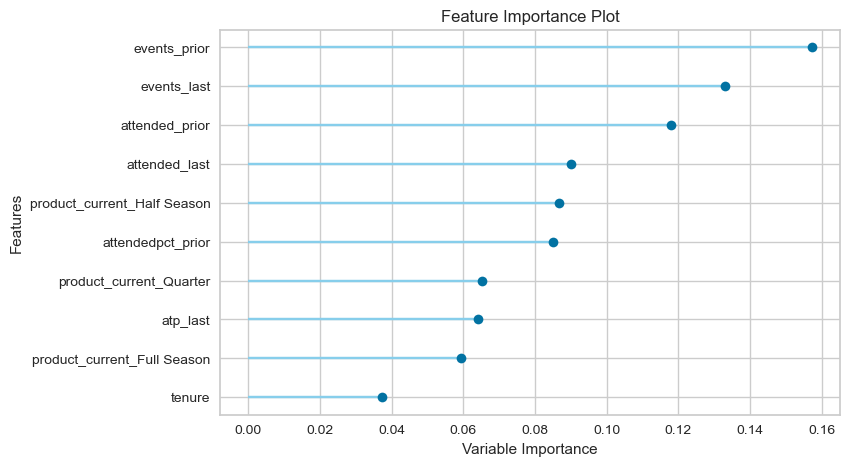

In [99]:
plot_model(final_model, plot='feature')

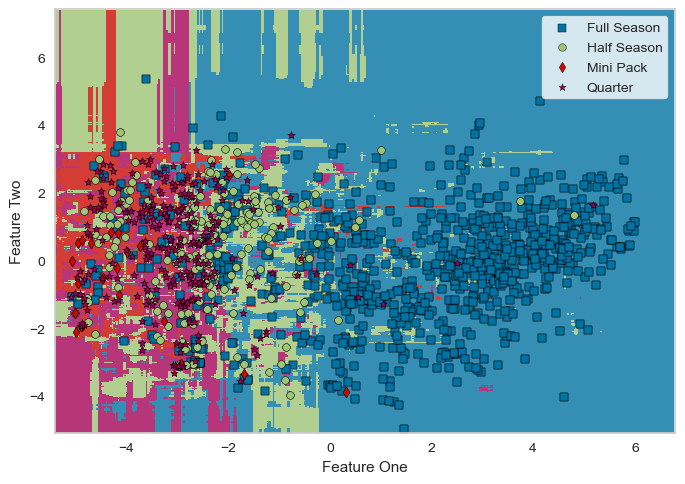

In [23]:
plot_model(final_model, plot='boundary')

## Model Inference

### Let's load in our inference data and get retention scores using the model:

In [ ]:
df_inference = helpers.get_product_propensity_dataset(
    cluster=CLUSTER,
    database=DATABASE,
    lkupclientid=LKUPCLIENTID,
    scoring_year=SCORING_YEAR,
    type_flag=1
)

# remove the target column from the inference df
df_inference = df_inference.drop(columns=["product"], axis=1)

df_inference.shape

Authorized as AROASQ4JELIXYLYV6P4UV:pmorrison@stellaralgo.com


(386380, 26)

In [ ]:
df_scores = predict_model(final_model, data=df_inference)

KeyError: "['distance_buckets', 'spend_current_buckets'] not in index"

## Upsell Leads

In [ ]:
df_upsell = df_scores[df_scores["product_current"].isin(product_plans)]

df_upsell_aggs = df_upsell.groupby(["Label","product_current"]).agg({
    "Label": "count",
})
df_upsell_aggs.columns = ["count"]

df_upsell_aggs

count
Label       product_current       
Full Season Full Season        251
            Half Season         53
            Mini Pack            6
            Quarter             15
Half Season Full Season         10
            Half Season        138
            Mini Pack            3
            Quarter             11
Mini Pack   Full Season          3
            Mini Pack            8
            Quarter              1
Quarter     Full Season         18
            Half Season         70
            Mini Pack           25
            Quarter            560

## Individual + None Leads

In [ ]:
df_other = df_scores[df_scores["product_current"].isin(["Individual", "None"])]

### Let's examine the top 20 Full Season leads in this grouping:

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_other[df_other["Label"]=="Full Season"].sort_values(by="Score", ascending=False).head(20)

,lkupclientid,clientcode,dimcustomermasterid,seasonyear,distance,tenure,events_prior,attended_prior,attendedpct_prior,events_last,attended_last,attendedpct_last,atp_last,product_last,product_current,spend_current,volume_current,attendance_current,events_current,sends,sends_prior,opens,opens_prior,date_last_send,date_last_touch,date_last_save,Label,Score
45110,7,CANUCKS,28879,2022,5.04,7,200,135,0.67500000000000000,37,24,0.64864864864864864,45.05,Full Season,None,5036.70,108,0E-17,35,30.0,12.0,42.0,21.0,2022-10-13,None,2022-10-19,Full Season,1.00
59436,7,CANUCKS,81301,2022,23.84,1,36,28,0.77777777777777777,0,0,0E-17,0.00,None,None,15885.96,224,0.77777777777777777,36,31.0,17.0,142.0,93.0,2022-10-13,None,2022-10-19,Full Season,1.00
198014,7,CANUCKS,475845,2022,6.96,7,180,134,0.74444444444444444,37,35,0.94594594594594594,42.57,None,None,3455.40,78,0.14285714285714285,35,33.0,20.0,48.0,48.0,2022-10-13,None,2022-10-18,Full Season,1.00
21629,7,CANUCKS,45564,2022,6.52,6,196,152,0.77551020408163265,38,34,0.89473684210526315,70.65,None,None,4882.40,72,0E-17,36,26.0,12.0,6.0,4.0,2022-10-13,None,2022-10-14,Full Season,1.00
39130,7,CANUCKS,37900,2022,1.83,7,90,89,0.98888888888888888,0,0,0E-17,0.00,None,None,0.00,0,0E-17,0,NaN,NaN,NaN,NaN,None,None,2022-10-13,Full Season,0.99
252761,7,CANUCKS,650881,2022,270.77,6,207,143,0.69082125603864734,38,2,0.05263157894736842,55.41,Full Season,None,7954.40,144,0.27777777777777777,36,30.0,13.0,20.0,17.0,2022-10-13,None,2022-10-19,Full Season,0.99
171375,7,CANUCKS,504372,2022,11.49,7,90,90,1.00000000000000000,0,0,0E-17,-0.00,None,None,0.00,0,0E-17,0,0.0,1.0,0.0,0.0,2022-04-29,None,2022-10-13,Full Season,0.99
175116,7,CANUCKS,404658,2022,3689.61,7,90,89,0.98888888888888888,0,0,0E-17,0.00,None,None,0.00,0,0E-17,0,NaN,NaN,NaN,NaN,None,None,2022-10-13,Full Season,0.99
235909,7,CANUCKS,670861,2022,84.72,7,163,127,0.77914110429447852,38,38,1.00000000000000000,56.07,None,None,3977.20,72,0.05555555555555555,36,44.0,23.0,94.0,53.0,2022-10-14,None,2022-10-14,Full Season,0.99
161684,7,CANUCKS,395980,2022,3697.87,7,90,89,0.98888888888888888,0,0,0E-17,0.00,None,None,0.00,0,0E-17,0,NaN,NaN,NaN,NaN,None,None,2022-10-13,Full Season,0.99
